### Batch Model - Precipitation from a closed pool

Gagnon et al. 2007 develop a simple and general relationship for multiple Me/Ca ratio behaviour during Rayleigh fractionation.

Following Elderfield et al (1996), the Sr/Ca of aragonite precipitated at any point during a Rayleigh process from a closed solution can be calculated from the initial composition assuming a constant effective partition coefficient:

$$
\left(\frac{Sr}{Ca}\right)_{coral} = D_{Sr}^{Coral} \left(\frac{Sr}{Ca}\right)_{Sol_{0}} F^{D_{Sr}^{Coral}-1}
$$

Where the extent of precipitation (i.e. fraction of Ca remaining in the solution) is defined as:

$$
F = \left(\frac{Ca}{Ca_{0}}\right)_{sol}
$$

The same expression can be written for Mg/Ca, and since Mg/Ca and Sr/Ca are linked by the extent of precipitation, F, the expressions can be combined, yielding a linear log-log relationship:

$$
\ln \left(\frac{Sr}{Ca}\right) = \left(\frac{D_{Sr}-1}{D_{Mg}-1}\right) \ln \left(\frac{Mg}{Ca}\right) + \left\{ \ln \left(\frac{Sr}{Ca}\right)_{0} - \left(\frac{D_{Sr}-1}{D_{Mg}-1}\right) \ln \left(\frac{Mg}{Ca}\right)_{0} \right\}
$$

In [48]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [49]:
# Write equation as a function (for log-log tracer graph)

def SrCaCoral_ln(Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0):
    return (((Dsr-1)/(Dmg-1)) * (MgCa_coral_ln) + (np.log(SrCa_sol0) - ((Dsr-1)/(Dmg-1)) * np.log(MgCa_sol0)))

In [50]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8e-3 # mol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1 # mol/mol seawater concentration

MgCa_coral_ln = np.linspace(-6.8e-3,-6e-3,100)

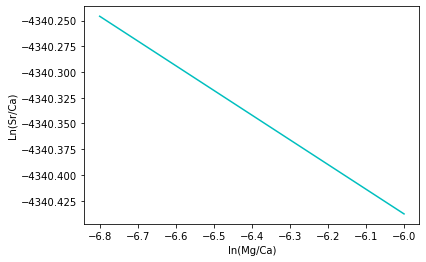

In [51]:
x = MgCa_coral_ln * 1e3  # converting to mmol/mol

plt.plot(x, (SrCaCoral_ln(Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('ln(Mg/Ca)')
plt.ylabel('Ln(Sr/Ca)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

### Try in all mmol/mol in case I am making mistakes with the converting...

In [56]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8 # mmol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1e3 # mmol/mol seawater concentration

MgCa_coral_ln = np.linspace(-6.8,-6,100)

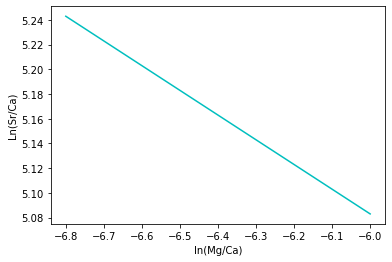

In [57]:
x = MgCa_coral_ln   

plt.plot(x, SrCaCoral_ln(Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0), alpha=1, color='c', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('ln(Mg/Ca)')
plt.ylabel('Ln(Sr/Ca)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

In [35]:
# Write equation as a function (for non-log graph)

def SrCaCoral(Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0):
    return (np.exp(((Dsr-1)/(Dmg-1)) * np.log(MgCa_coral) + (np.log(SrCa_sol0) - ((Dsr-1)/(Dmg-1)) * np.log(MgCa_sol0))))

In [29]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8e-3 # mol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1 # mol/mol seawater concentration

MgCa_coral = np.linspace(1e-3,2.7e-3,100) 

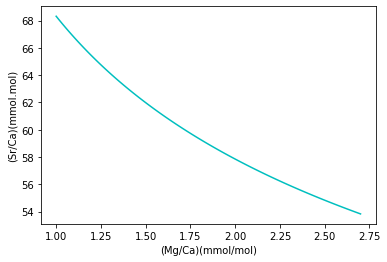

In [30]:
x = MgCa_coral * 1e3  # converting to mmol/mol

plt.plot(x, (SrCaCoral(Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('(Mg/Ca)(mmol/mol)')
plt.ylabel('(Sr/Ca)(mmol.mol)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

### Try in all mmol/mol again

In [36]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8 # mmol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1e3 # mmol/mol seawater concentration

MgCa_coral = np.linspace(1,2.7,100) 

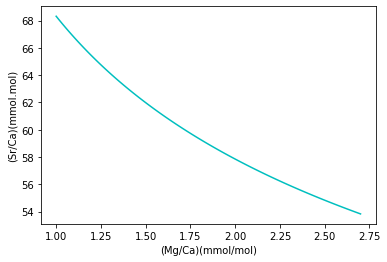

In [37]:
x = MgCa_coral  

plt.plot(x, SrCaCoral(Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0), alpha=1, color='c', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('(Mg/Ca)(mmol/mol)')
plt.ylabel('(Sr/Ca)(mmol.mol)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

Ok, this we are getting the same thing, so it is not a units problem here.

## Now we define a batch model with active calcium pumping.

We incorporate the variable $\phi$, which accounts for changes in $\left([Ca\right])_{Sol}$ affecting all Me/Ca ratios.

In [ ]:
# Write equation as a function (for non-log graph)

def SrCaCoral(phi, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0):
    return (np.exp(((phi*Dsr-1)/(phi*Dmg-1)) * np.log(MgCa_coral) + (np.log(SrCa_sol0) - ((phi*Dsr-1)/(phi*Dmg-1)) * np.log(MgCa_sol0))))

